In [5]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 5000

# Generate Time column
time = np.arange(n_samples)

# Generate anonymized PCA features (V1...V28)
features = np.random.randn(n_samples, 28)

# Generate Amounts (skewed towards small values)
amount = np.random.exponential(scale=100, size=n_samples).round(2)

# Fraud labels (very imbalanced ~1%)
fraud_ratio = 0.01
labels = np.random.choice([0, 1], size=n_samples, p=[1-fraud_ratio, fraud_ratio])

# Create DataFrame
cols = ["Time"] + [f"V{i}" for i in range(1, 29)] + ["Amount", "Class"]
data = np.column_stack([time, features, amount, labels])
df = pd.DataFrame(data, columns=cols)

# Save CSV
df.to_csv("creditcard_small.csv", index=False)
print("✅ creditcard_small.csv created with shape:", df.shape)


✅ creditcard_small.csv created with shape: (5000, 31)


In [6]:
df = pd.read_csv("creditcard_small.csv")
print("✅ Dataset Loaded")
print("Shape:", df.shape)
df.head()


✅ Dataset Loaded
Shape: (5000, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,...,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,11.61,0.0
1,1.0,-0.600639,-0.291694,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,...,0.343618,-1.763040,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280,47.67,0.0
2,2.0,-0.839218,-0.309212,0.331263,0.975545,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,...,0.087047,-0.299007,0.091761,-1.987569,-0.219672,0.357113,1.477894,-0.518270,17.86,0.0
3,3.0,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,0.097078,0.968645,-0.702053,...,-0.161286,0.404051,1.886186,0.174578,0.257550,-0.074446,-1.918771,-0.026514,104.51,0.0
4,4.0,0.060230,2.463242,-0.192361,0.301547,-0.034712,-1.168678,1.142823,0.751933,0.791032,...,-1.062304,0.473592,-0.919424,1.549934,-0.783253,-0.322062,0.813517,-1.230864,111.88,0.0


In [7]:
# Dataset info
print("Dataset Info:")
print(df.info())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5000 non-null   float64
 1   V1      5000 non-null   float64
 2   V2      5000 non-null   float64
 3   V3      5000 non-null   float64
 4   V4      5000 non-null   float64
 5   V5      5000 non-null   float64
 6   V6      5000 non-null   float64
 7   V7      5000 non-null   float64
 8   V8      5000 non-null   float64
 9   V9      5000 non-null   float64
 10  V10     5000 non-null   float64
 11  V11     5000 non-null   float64
 12  V12     5000 non-null   float64
 13  V13     5000 non-null   float64
 14  V14     5000 non-null   float64
 15  V15     5000 non-null   float64
 16  V16     5000 non-null   float64
 17  V17     5000 non-null   float64
 18  V18     5000 non-null   float64
 19  V19     5000 non-null   float64
 20  V20     5000 non-null   float64
 21  V21     5000 non-null  

C:\Users\Aditi\AppData\Local\Temp\ipykernel_6084\1682267362.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="Set2")


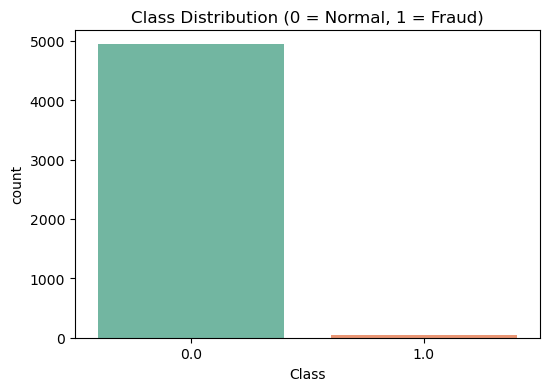

Fraud Ratio: 0.0109


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, palette="Set2")
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()

fraud_count = df["Class"].value_counts()
fraud_ratio = fraud_count[1] / fraud_count[0]
print(f"Fraud Ratio: {fraud_ratio:.4f}")


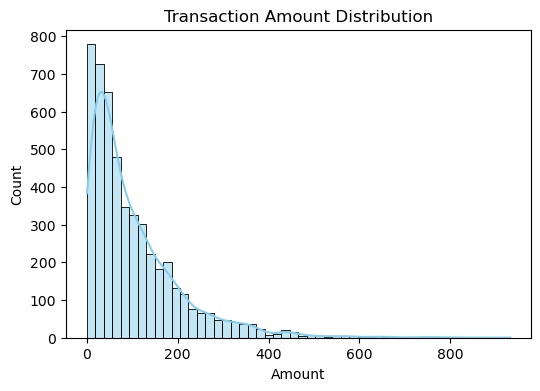

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df["Amount"], bins=50, kde=True, color="skyblue")
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.show()


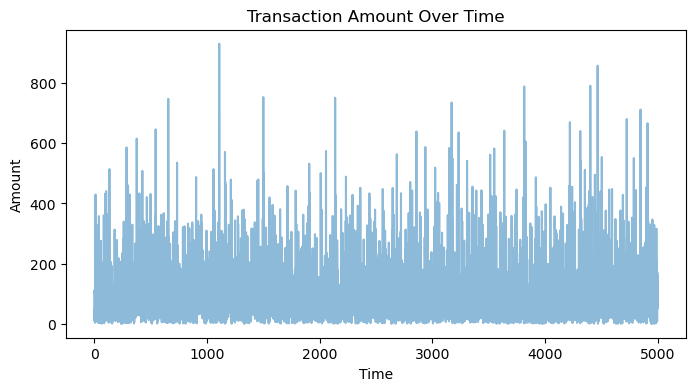

In [10]:
plt.figure(figsize=(8,4))
sns.lineplot(x="Time", y="Amount", data=df, alpha=0.5)
plt.title("Transaction Amount Over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()


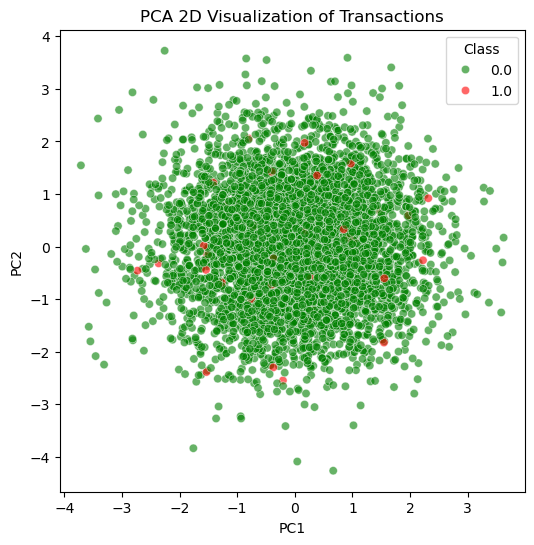

In [11]:
from sklearn.decomposition import PCA

features = df.drop(columns=["Time", "Amount", "Class"])
pca = PCA(n_components=2)
components = pca.fit_transform(features)

df_pca = pd.DataFrame(components, columns=["PC1", "PC2"])
df_pca["Class"] = df["Class"]

plt.figure(figsize=(6,6))
sns.scatterplot(x="PC1", y="PC2", hue="Class", data=df_pca, palette=["green", "red"], alpha=0.6)
plt.title("PCA 2D Visualization of Transactions")
plt.show()


In [12]:
print("Summary Statistics:")
df.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Time,5000.0,2499.500000,1443.520003,0.000000,1249.750000,2499.500000,3749.250000,4999.000000
V1,5000.0,0.011294,1.001861,-3.384669,-0.664828,0.015861,0.678171,3.727833
V2,5000.0,-0.019313,1.003080,-3.563593,-0.702212,-0.026622,0.656962,3.712795
V3,5000.0,0.019855,1.026816,-3.321115,-0.683313,0.019005,0.722286,3.285724
V4,5000.0,-0.006854,1.010328,-3.627208,-0.694231,-0.011100,0.676024,3.529055
V5,5000.0,-0.009970,0.993052,-3.532093,-0.690991,0.011570,0.649632,3.611350
V6,5000.0,0.008085,0.997313,-4.465604,-0.683890,0.016110,0.686633,3.745379
V7,5000.0,0.004830,0.998403,-3.453354,-0.670876,0.003451,0.676510,3.536532
V8,5000.0,0.015741,0.990854,-4.157734,-0.645740,0.029398,0.676364,3.942331
V9,5000.0,0.011137,1.008530,-3.940008,-0.655763,0.014260,0.693637,3.617462
